Hola **Alejandro**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

# Proyecto Sprint 13: Pronósticos y predicciones
### Este proyecto consiste en  analizar y elaborar una estrategia de retención de clientes para una cadena de gimnasios que quiere elaborar una estrategia de interaccion con sus clientes basado en datos analíticos ya que es comun que estas empresas se enfrenten frecuentemente a la perdida de clientes, por lo que en este proyecto tendremos que aprender a predecir la probabilidad de pérdida (para el próximo mes) para cada cliente con la ayuda de modelos que nos ayuden a realizar la prediccion de cancelación. Ademas tendremos que probar la eficacia de tales modelos con metricas de confianza y eleguir el modelo que nos de mejores resultados. en la otra parte del proyecto tendremos que elaborar retratos o klusteres de usuarios típicos: selecciona los grupos más destacados y describe sus características principales.
### Por ultimo tendremos que sacar conclusiones básicas y elaborar recomendaciones para mejorar la atención al cliente

### Etapas del analisis:
### EDA(Analisis exploratorio de los datos
### Prueba de dos modelos diferentes para la predicción
### Klusterización
### Conclusiones y recomendaciones




In [26]:
#Cargamos el dataset:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

<div class="alert alert-block alert-info">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Una buena práctica para cuando tengas que importar varias librerías es seguir el siguiente órden en las mismas:

- Primero todas las librerías que vienen ya con python cómo `datetime`, `os`, `json`, etc.
- Luego de las librerías de Python si las de terceros cómo `pandas`, `scipy`, `numpy`, etc.
- Por último, en el caso de que armes tu propio módulo en tu proyecto esto debería ir en tercer lugar, y recuerda siempre ordenar cada tipo por orden alfabético
    
Para cada sección se deben ordenar en orden alfabético
</div>

<div class="alert alert-block alert-info">
<b>Listo, se ordenan por seccion y por orden alfabético las librerias.</b> <a class=“tocSkip”></a>
</div>

In [27]:
df_gym = pd.read_csv('/datasets/gym_churn_us.csv')
df_gym.shape


(4000, 14)

Tenemos un buen tamaño de muestra para realizar el modelo

# EDA

In [28]:
df_gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Podemos observar que no hay valores nulos

In [29]:
df_gym.duplicated().sum()

0

No hay filas duplicadas


In [30]:
df_gym.describe(percentiles= [0.25,0.5,0.75,0.90,0.99])

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
90%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,33.000000,277.717199,12.000000,9.000000,3.173943,3.174538,1.000000
99%,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,37.000000,400.996125,12.000000,17.000000,4.197579,4.185758,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


En esta seccion vale la pena ver mas las columnas con datos continuos o numericos como los 'AVG' ya que todas las demas son columnas categoricas binarias(0-1) por lo que no tiene mucho sentido ver las proporciones, sin embargo podemos observar que en las columnas con valores numericos continuos, no hay outliers o valores atípicos.

In [31]:
#Observa los valores medios de las características en dos grupos: para las personas que se fueron (cancelación) y para las que se quedaron (utiliza el método groupby()).
df_gym.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Podemos observar que hay columnas que se relacionan con la varfiable objetivo, en este caso 'Churn' por ejemplo en la columna 'Partner'los clientes que pertenecen a una empresa asociada al gymnasio tienden no cancelar su subscripción, mientras que los que no pertenecen, tienden a cancelar mas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto! Esta es una muy buena primer exploración de tus datos, siempre es importante revisar con lo que se trabajará
</div>

In [32]:
#creamos una funcion que nos muestre visualmente las proporciones de cada 
#caracteristica de los datos tanto de los que cancelaron como de los que no.
def histogramas(X,column,key_columns):
    data_new=X.copy()
    data_new[key_columns] = df_gym[key_columns]
    for y in key_columns:
        for x in X[column].unique():
            sns.histplot(data_new[data_new[column]== x][y],
                        label = '{}={}'.format(column,str(x),bins = 10))
        plt.title(y)
        plt.legend()
        plt.show()
                        


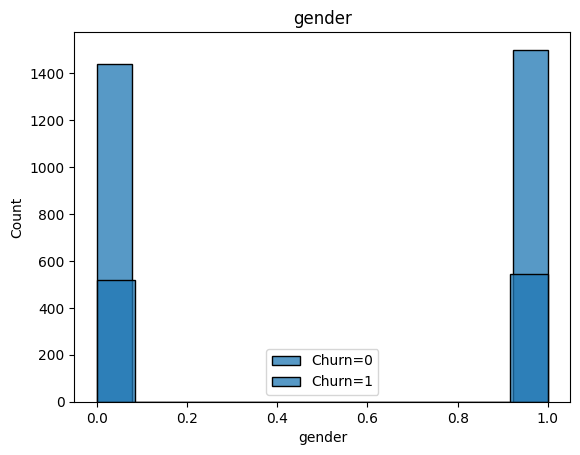

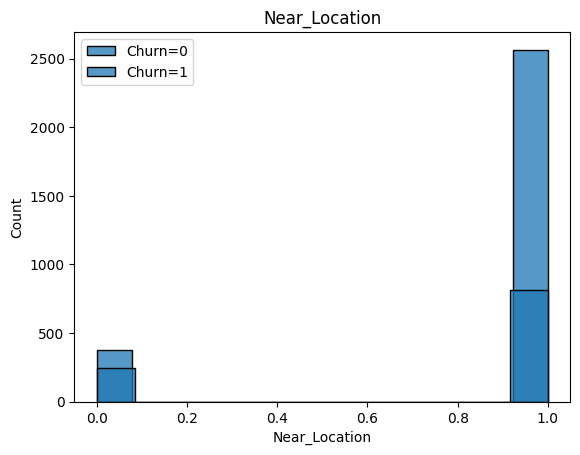

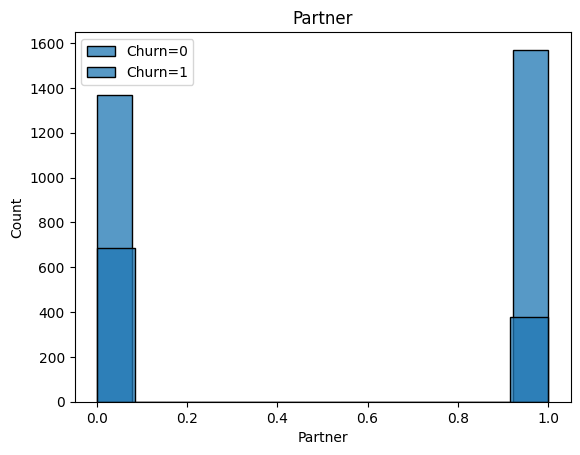

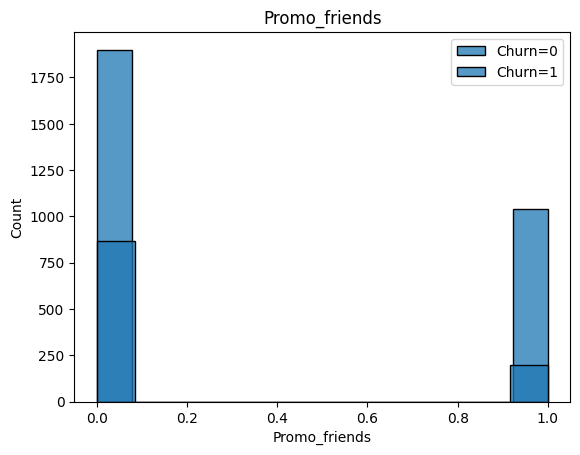

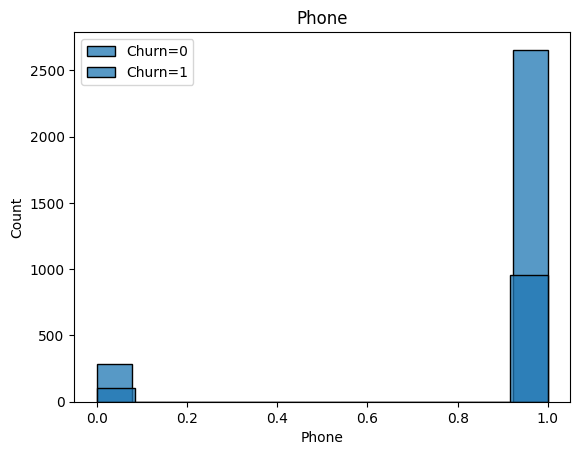

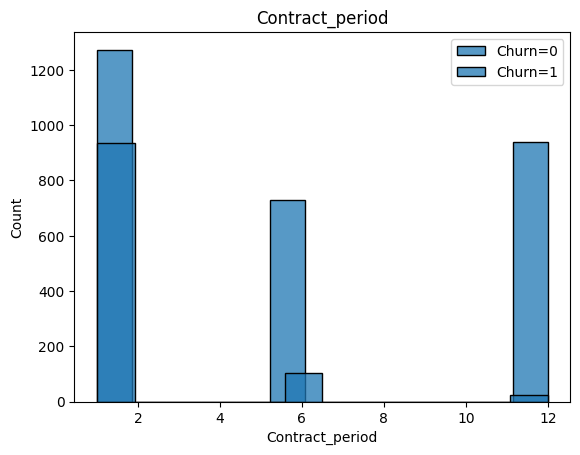

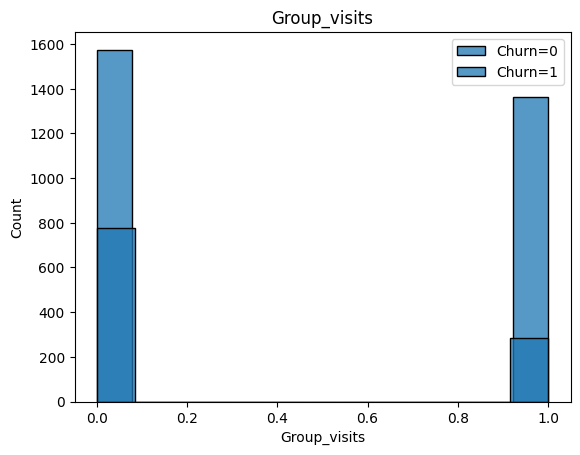

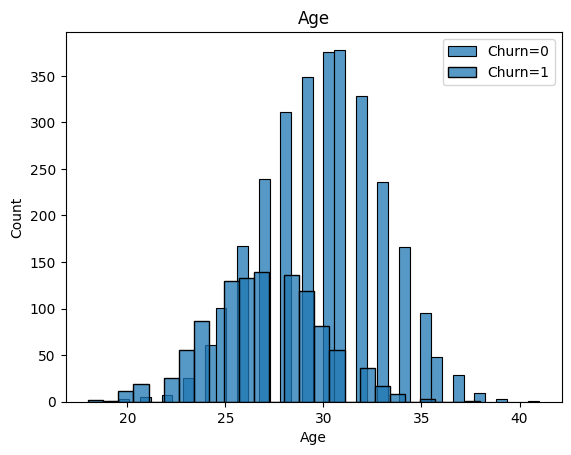

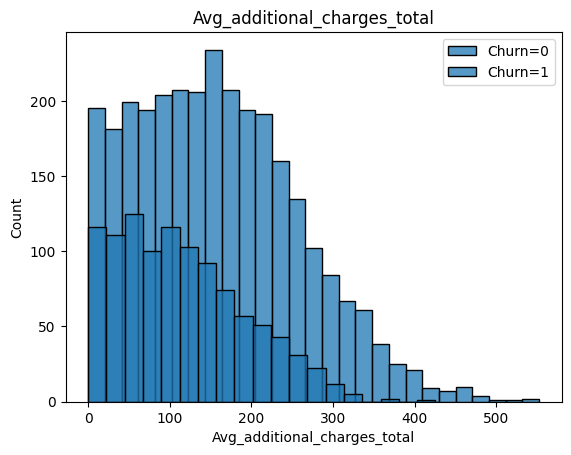

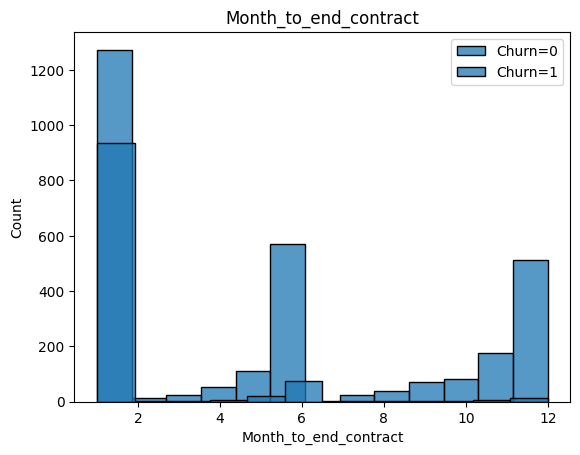

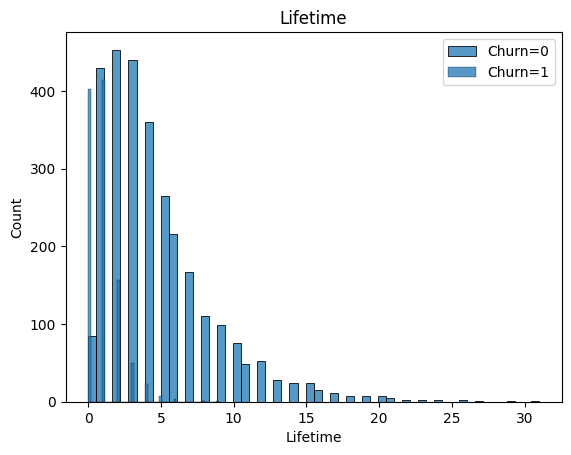

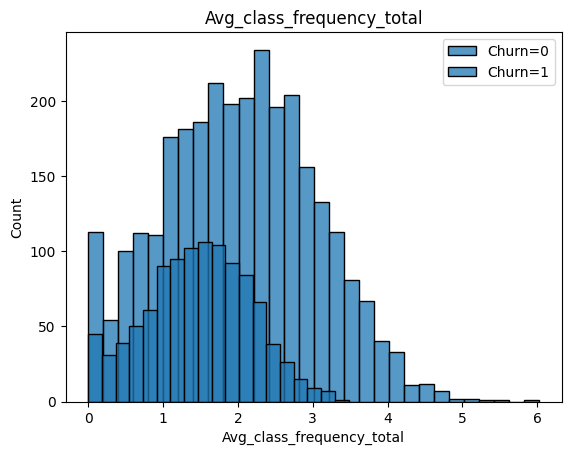

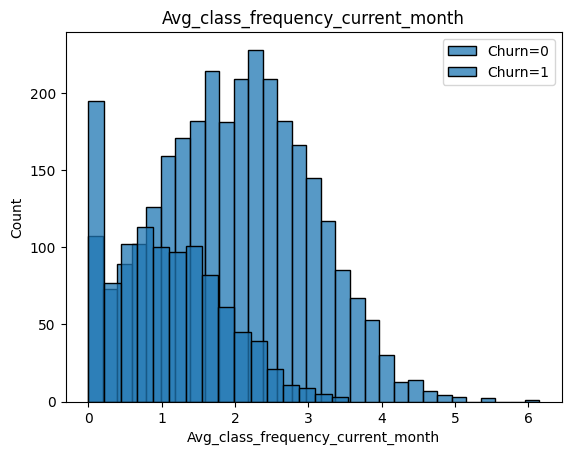

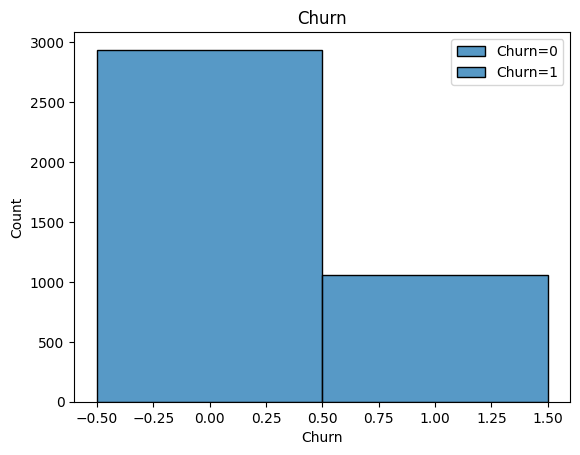

In [33]:
histogramas(df_gym,'Churn',df_gym.columns)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset. 
</div>

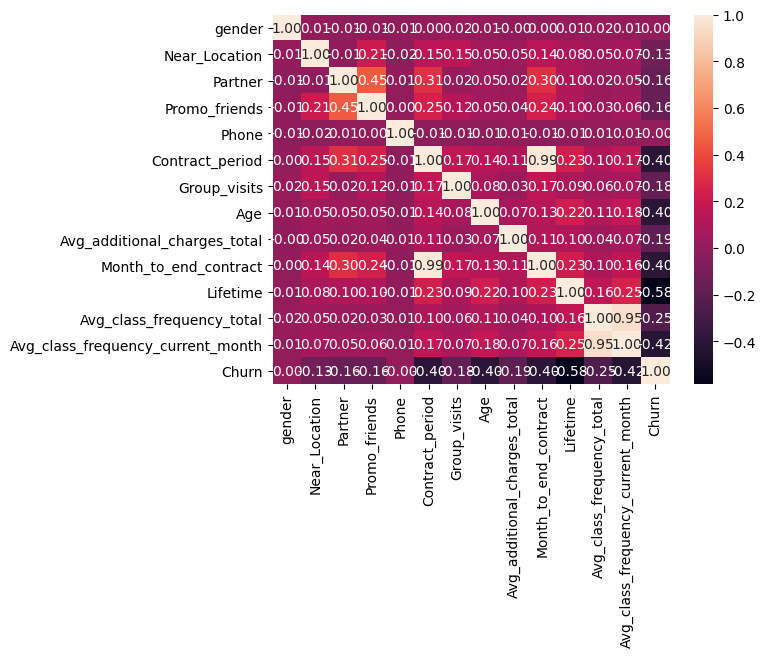

In [34]:
#creamos la matriz de correlación
corr_gym=df_gym.corr(method='spearman')
sns.heatmap(corr_gym, annot = True, fmt=".2f")
plt.show()

Creamos la matríz de correlacion y cambiamos el metodo por defecto por el metodo 'spearman' para una mayor exactitud
Sin embargo parece ser que no hay mucha correlación entre las columnas, esto podria deberse a que la mayoria son de tipo binario(0-1)

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra
</div>

In [35]:
#Vamos a dividir los datos de prueba y de entrenamiento y crear la matriz (X) de caracteristicas y (y) como variable objetivo.
X=df_gym.drop('Churn',axis=1)
y=df_gym['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=df_gym['Churn'])



In [36]:
y_train.value_counts(1),y_test.value_counts(1)

(0    0.734688
 1    0.265313
 Name: Churn, dtype: float64,
 0    0.735
 1    0.265
 Name: Churn, dtype: float64)

In [37]:
#escalamos los datos en base en base a los datos que tenemos
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

# aplico la estandarización a la matriz de característica para el test de prueba
X_test_st = scaler.transform(X_test)


In [38]:
#Creamos el primer modelo 'LogisticRegression'
model = LogisticRegression(random_state=0)
model.fit(X_train_st, y_train)
#sacamos los datos de validacion
predictions = model.predict(X_test_st)
predictions_train = model.predict(X_train_st)


In [39]:
#Evaluamos el modelo con las metricas de precision y recall
print('Métrica Accuracy:{:.2f}'.format(accuracy_score(y_test,predictions)))
print('Métrica Presicion:{:.2f}'.format(precision_score(y_test,predictions)))
print('Métrica Recall:{:.2f}'.format(recall_score(y_test,predictions)))

Métrica Accuracy:0.94
Métrica Presicion:0.90
Métrica Recall:0.85


In [40]:
#Creamos el segundo modelo ' RandomForestClassifier'
model_rf = RandomForestClassifier(random_state=0)
model_rf.fit(X_train_st, y_train)
#sacamos los datos de validacion
predictions_rf = model_rf.predict(X_test_st)
predictions_train_rf = model_rf.predict(X_train_st)


In [41]:
print('Métrica Accuracy:{:.2f}'.format(accuracy_score(y_test,predictions_rf)))
print('Métrica Presicion:{:.2f}'.format(precision_score(y_test,predictions_rf)))
print('Métrica Recall:{:.2f}'.format(recall_score(y_test,predictions_rf)))

Métrica Accuracy:0.92
Métrica Presicion:0.88
Métrica Recall:0.83


 Primera conclusion: el modelo 'LogisticRegression' es la mejor opcion para el algoritmo de Aprendizaje automatizado,ya que apesar de que las diferencias a simple vista no son muy significativas, si trasladaramos esas diferencias a grandes sumas de dinero, la diferencia cobraria sentido.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Analizaste los resultados de los entrenamiento de los modelos de manera correcta
    
</div>

# Segunda parte: Crear clústeres de usuarios/as

In [42]:
#Estandarizamods los datos ahora sin dividirlos o partirlos 
df_gym_scaler = scaler.fit_transform(df_gym)
Z = linkage(X_train_st, method='ward')
Z

array([[8.64000000e+02, 1.88400000e+03, 1.00575820e-01, 2.00000000e+00],
       [2.72000000e+02, 2.54500000e+03, 1.22142818e-01, 2.00000000e+00],
       [2.20800000e+03, 2.59200000e+03, 1.27642395e-01, 2.00000000e+00],
       ...,
       [6.38600000e+03, 6.39500000e+03, 7.48091163e+01, 2.11300000e+03],
       [6.38700000e+03, 6.39600000e+03, 8.08691515e+01, 2.42300000e+03],
       [6.39300000e+03, 6.39700000e+03, 9.32018254e+01, 3.20000000e+03]])

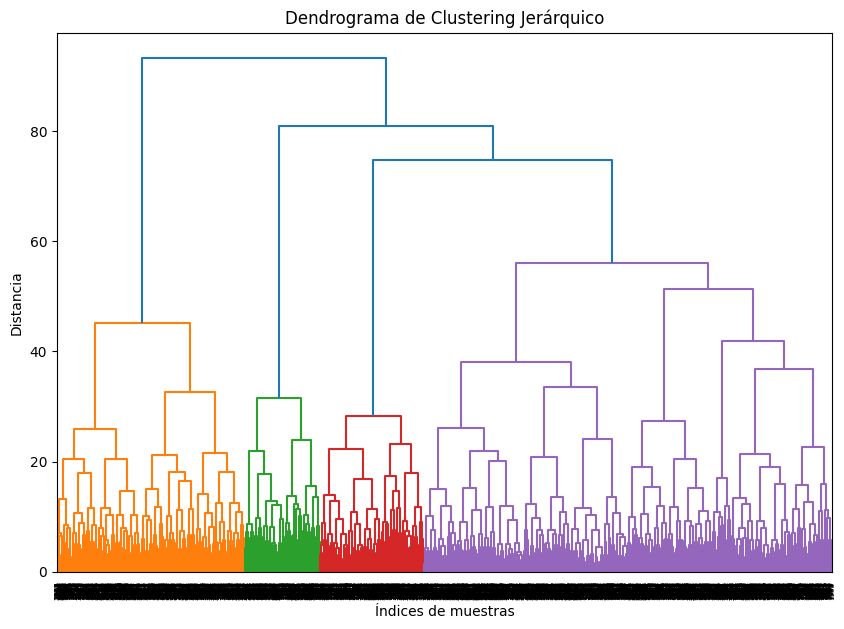

In [43]:
#Visualizamos el dendograma 
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma de Clustering Jerárquico')
plt.xlabel('Índices de muestras')
plt.ylabel('Distancia')
plt.show()

In [44]:
km = KMeans(n_clusters=5,random_state=0)
labels = km.fit_predict(df_gym_scaler)

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

El argumento random_state no existe para la función de fit_predict de este modelo, por eso te causa el error
</div>

<div class="alert alert-block alert-info">
<b>Listo, se elimina el 'random state' que producia el error.</b> <a class=“tocSkip”></a>
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cambio!
</div>

In [45]:
df_gym['cluster_km'] = labels


In [46]:
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize = (10, 10))
    sns.scatterplot(x=df[x_name], y=df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

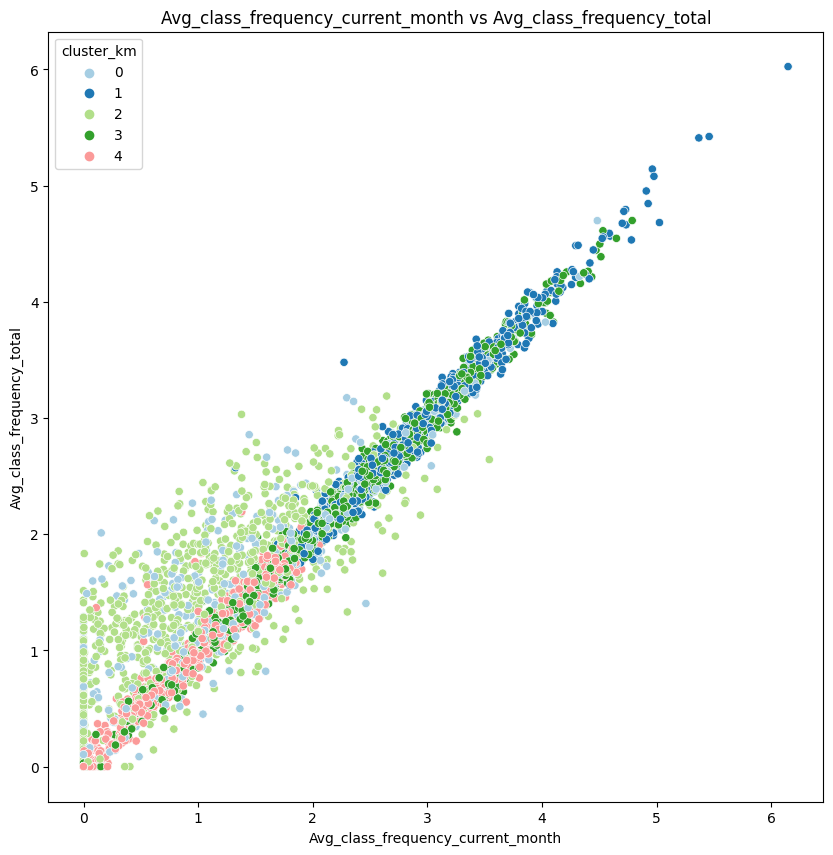

In [47]:
show_clusters_on_plot(df_gym, 'Avg_class_frequency_current_month','Avg_class_frequency_total' ,'cluster_km')

In [48]:
#Sacamos la tasa de 'Churn'
count_of_each_cluster =(df_gym.groupby
                        (['cluster_km'])['Churn']
                        .count()
                        .reset_index()
                       )
sum_of_each_cluster = (df_gym.groupby
                       (['cluster_km'])['Churn']
                       .sum()
                       .reset_index())
                       #.rename(columns={'Churn_y':'Churn_sum'})
                       
proporcion=count_of_each_cluster.merge(sum_of_each_cluster, on='cluster_km')
proporcion['proportion_churn']=proporcion['Churn_y'] / proporcion['Churn_x']
proporcion
#Mira los valores medios de característica para los clústeres.¿Hay algo que te llame la atención?
#Traza distribuciones de características para los clústeres. ¿Notas algo?
#Calcula la tasa de cancelación para cada clúster (utiliza el método groupby()). ¿Difieren en términos de tasa de cancelación? ¿Qué grupos son propensos a irse y cuáles son leales?

,cluster_km,Churn_x,Churn_y,proportion_churn
0,0,544,245,0.450368
1,1,767,6,0.007823
2,2,821,789,0.961023
3,3,1180,4,0.003390
4,4,688,17,0.024709


Podemos ver que el clúster 2 tiene una tasa muy alta de cancelacion casi todos los clientes estan cancelando.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
    
</div>

### Conclusiones y recomendaciones

- **Utilizar el modelo de LogisticRegression**:Tiene mejores resultados en las metricas.

- **Invertir Más en los clusters 2 y 0**:
  - **Cluster 2**: Tiene una tasa de cancelación muy elevada(0.961023, casi llegando a la totalidad de los usuarios , es decir, en este grupo de clientes el 96% de clientes han o van a cancelar.Se suguiere crear una estrategia de marketing para este grupo urgentemente.
  - **cluster 0**: También muestra una tasa de cancelacion, si no alarmante, si considerable. Se recomienda tambien invertir en este grupo de clientes.
 




<div class="alert alert-block alert-info">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo Alejandro, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Te felicito por las conclusiones planteadas luego de ver los resultados de la segmentación utilizando los cluster, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
Sólo ocurrió un pequeño error en la ejecución debido a un argumento que no admite el modelo, con esa corrección tendrás tu proyecto completo.
    
Saludos!
</div>